In [1]:
# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## **Data** **Collection**

In [3]:
# Load the data
train_df = pd.read_csv('/content/drive/My Drive/Airline/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Airline/test.csv')
data = pd.concat([train_df, test_df])

In [4]:
# Display basic information for both datasets
data_info = {
    'shape': data.shape,
    'columns': data.dtypes.to_dict()
}

data_info

{'shape': (129880, 24),
 'columns': {'id': dtype('int64'),
  'Gender': dtype('O'),
  'Customer Type': dtype('O'),
  'Age': dtype('int64'),
  'Type of Travel': dtype('O'),
  'Class': dtype('O'),
  'Flight Distance': dtype('int64'),
  'Inflight wifi service': dtype('int64'),
  'Departure/Arrival time convenient': dtype('int64'),
  'Ease of Online booking': dtype('int64'),
  'Gate location': dtype('int64'),
  'Food and drink': dtype('int64'),
  'Online boarding': dtype('int64'),
  'Seat comfort': dtype('int64'),
  'Inflight entertainment': dtype('int64'),
  'On-board service': dtype('int64'),
  'Leg room service': dtype('int64'),
  'Baggage handling': dtype('int64'),
  'Checkin service': dtype('int64'),
  'Inflight service': dtype('int64'),
  'Cleanliness': dtype('int64'),
  'Departure Delay in Minutes': dtype('int64'),
  'Arrival Delay in Minutes': dtype('float64'),
  'satisfaction': dtype('O')}}

Shape: 129,880 rows and 24 columns

Columns and Data Types: The columns and their data types in the test set are identical to those in the training set.

In [9]:
# Extracting specific column information for both datasets
specific_columns_info = {
    'Type of Travel': {
        'data_type': data['Type of Travel'].dtype,
        'description': "Indicates the purpose of the flight from the passenger's perspective, e.g., Personal or Business."
    },
    'Flight Distance': {
        'data_type': data['Flight Distance'].dtype,
        'description': "The total distance traversed by the aircraft in Km."
    },
    'Gate location': {
        'data_type': data['Gate location'].dtype,
        'description': "A numerical rating representing the passenger's satisfaction with the gate's location."
    },
    'Leg room service': {
        'data_type': data['Leg room service'].dtype,
        'description': "Numerical rating for the satisfaction with the leg room service offered during the flight."
    },
    'Arrival Delay in Minutes': {
        'data_type': data['Arrival Delay in Minutes'].dtype,
        'description': "Delay in minutes from the scheduled arrival time of the flight, as a continuous numerical value."
    },
    'Satisfaction': {
        'data_type': data['satisfaction'].dtype,
        'description': "Final customer satisfaction status. (Target variable)"
    }
}

specific_columns_info

{'Type of Travel': {'data_type': dtype('O'),
  'description': "Indicates the purpose of the flight from the passenger's perspective, e.g., Personal or Business."},
 'Flight Distance': {'data_type': dtype('int64'),
  'description': 'The total distance traversed by the aircraft in Km.'},
 'Gate location': {'data_type': dtype('int64'),
  'description': "A numerical rating representing the passenger's satisfaction with the gate's location."},
 'Leg room service': {'data_type': dtype('int64'),
  'description': 'Numerical rating for the satisfaction with the leg room service offered during the flight.'},
 'Arrival Delay in Minutes': {'data_type': dtype('float64'),
  'description': 'Delay in minutes from the scheduled arrival time of the flight, as a continuous numerical value.'},
 'Satisfaction': {'data_type': dtype('O'),
  'description': 'Final customer satisfaction status. (Target variable)'}}

**Type of Travel**

Data Type: Categorical

Description: Indicates the purpose of the flight from the passenger's perspective. This could include categories such as personal, business, or other types of travel. It reflects whether the journey is primarily for business purposes or personal reasons.

**Flight Distance**

Data Type: Integer

Description: This feature quantifies the length of each journey taken by passengers. Analyzing this column in conjunction with passenger satisfaction ratings could reveal insights into how distance impacts passenger perceptions and expectations, potentially identifying specific needs or preferences associated with short-haul versus long-haul flights.

**Gate Location**

Data Type: Integer

Description: A numerical rating that likely represents the passenger's satisfaction with the location of the gate. Although the exact scale is not described, it's reasonable to infer that higher values might indicate more favorable perceptions of the gate's convenience, accessibility, or proximity to related airport services.

**Leg Room Service**

Data Type: Integer

Description: This is a numerical rating given by passengers regarding the leg room service offered during the flight. Similar to "Gate location," the specifics of the scale are not provided, but higher values presumably denote higher satisfaction with the amount of leg room or the quality of accommodations related to leg space.

**Arrival Delay in Minutes**

Data Type: Float

Description: Represents the delay in minutes from the scheduled arrival time of the flight. This is a continuous numerical value that quantifies the length of delay experienced upon arrival. The precision of this measurement being a float suggests it can account for partial minutes, offering a detailed view of delays.

**Satisfaction**

Data Type: Categorical (Binary)

Description: The target variable, reflecting the passengers' overall assessment of their flight experience. It categorizes responses into two principal classes: 'satisfied' and 'not satisfied', encapsulating the comprehensive evaluation of various flight service dimensions. This binary distinction enables us to investigate the multifaceted factors contributing to passenger satisfaction, thus serving as a critical indicator for assessing and enhancing airline service quality.

In [6]:
# Preview the first few rows of each dataset to understand their structure
data_head = data.head()
data_head

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## **Data Preparation and Cleaning**

In [7]:
# Checking for NaN values in specified columns
print("Train : \n", data[['Type of Travel', 'Flight Distance', 'Gate location', 'Leg room service', 'Arrival Delay in Minutes', 'satisfaction']].isna().sum())

Train : 
 Type of Travel                0
Flight Distance               0
Gate location                 0
Leg room service              0
Arrival Delay in Minutes    393
satisfaction                  0
dtype: int64


In [10]:
# Filling the missing values
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

# Train data
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)

# Test data
test_df['Arrival Delay in Minutes'].fillna(test_df['Arrival Delay in Minutes'].median(), inplace=True)

Since we have missing values in Arrival Delay in minutes:

For the numerical column Arrival Delay in Minutes, we imputed NaN values with the median of the column for both training and test datasets.

## **Exploratory Data Analysis (EDA)**

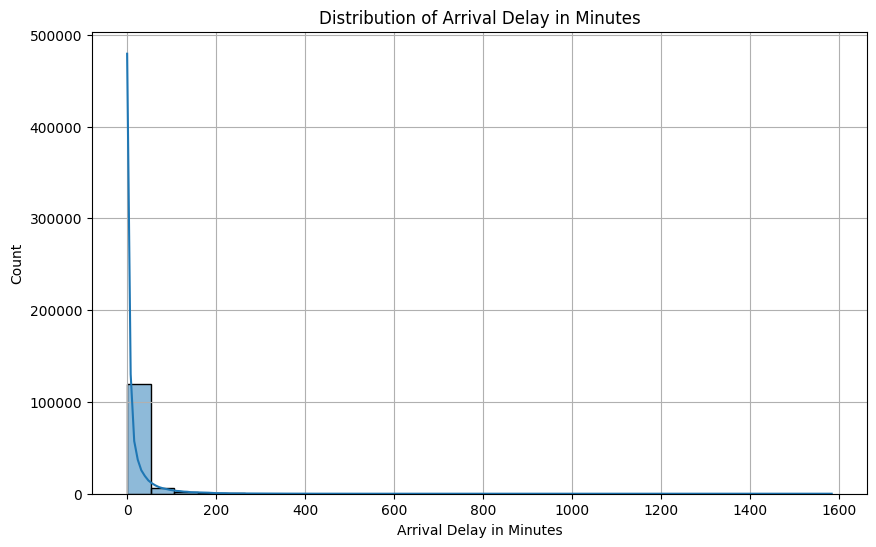

Train: 
 Type of Travel
Business travel    0.690584
Personal Travel    0.309416
Name: proportion, dtype: float64 Leg room service
4    0.276301
5    0.237950
3    0.192917
2    0.188944
1    0.099284
0    0.004604
Name: proportion, dtype: float64 count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64


In [11]:
# Summary for 'Type of Travel' and 'Leg room service'
type_of_travel_distribution = data["Type of Travel"].value_counts(normalize=True)
leg_room_service_distribution = data["Leg room service"].value_counts(normalize=True)

# Summary statistics for 'Arrival Delay in Minutes'
arrival_delay_summary = data["Arrival Delay in Minutes"].describe()

# Plotting the distribution of 'Arrival Delay in Minutes'
plt.figure(figsize=(10, 6))
sns.histplot(data["Arrival Delay in Minutes"], bins=30, kde=True)
plt.title('Distribution of Arrival Delay in Minutes')
plt.grid()
plt.show()
print("Train:", "\n", type_of_travel_distribution, leg_room_service_distribution, arrival_delay_summary)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


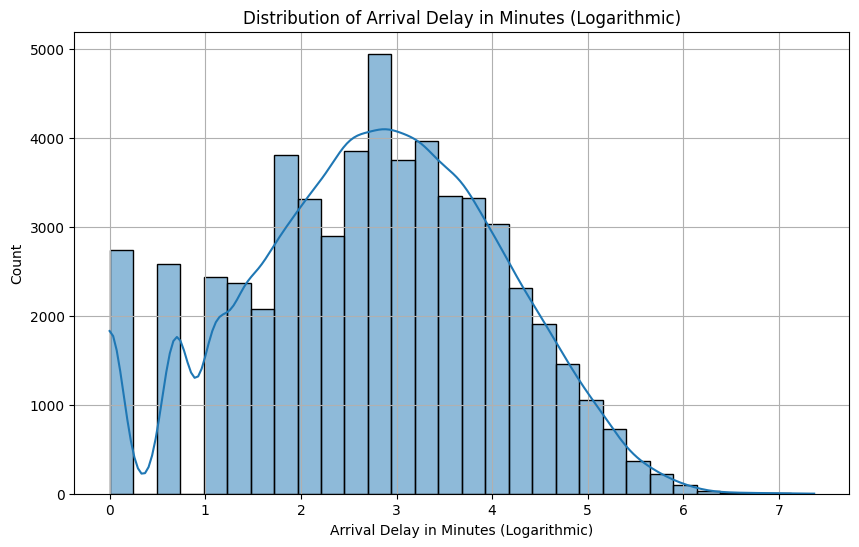

In [12]:
# Plotting the logarithmic distribution of 'Arrival Delay in Minutes'
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data["Arrival Delay in Minutes"]), bins=30, kde=True)
plt.title('Distribution of Arrival Delay in Minutes (Logarithmic)')
plt.xlabel('Arrival Delay in Minutes (Logarithmic)')
plt.grid()
plt.show()

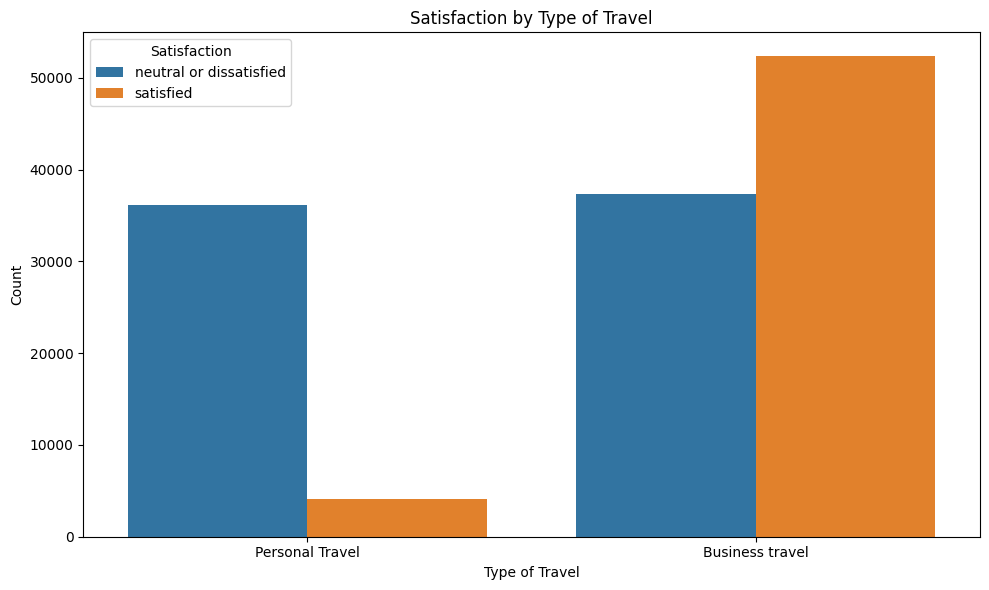

In [13]:
# Satisfaction by Type of Travel
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Travel', hue='satisfaction', data=data)
plt.title('Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

This plot reveals the distribution of passenger satisfaction across different types of travel. It indicates how the purpose of travel might influence passengers' overall satisfaction, showing a clear distinction in satisfaction levels between different travel types.

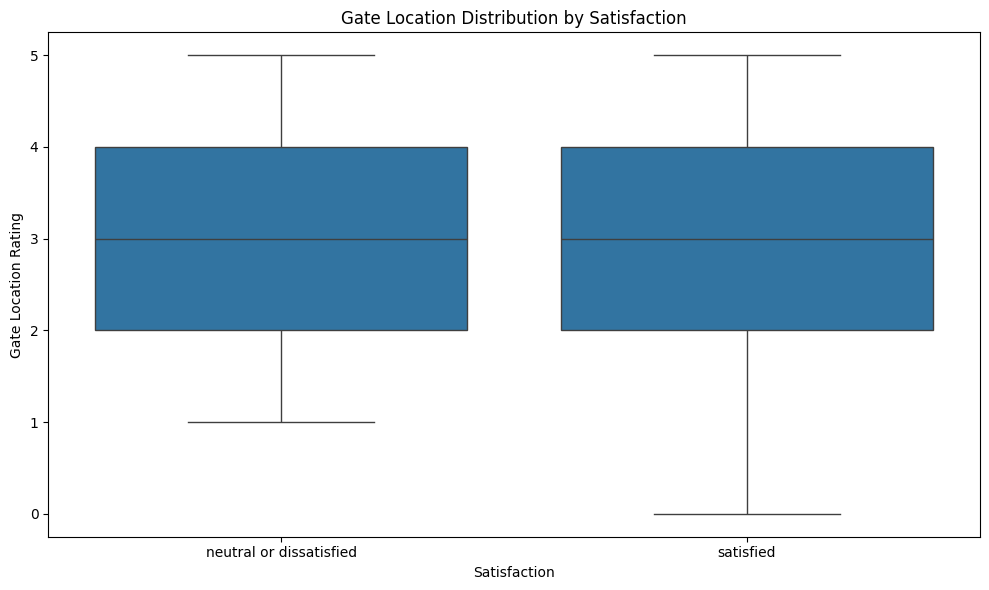

In [14]:
# Gate location distribution by satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Gate location', data=data)
plt.title('Gate Location Distribution by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Gate Location Rating')
plt.tight_layout()
plt.show()

The boxplot for gate location ratings by satisfaction status shows the spread and central tendency of gate location satisfaction among satisfied and not satisfied passengers. This could imply how significant the gate's location is to overall satisfaction, with potential insights into whether less satisfied passengers commonly report lower gate location ratings.

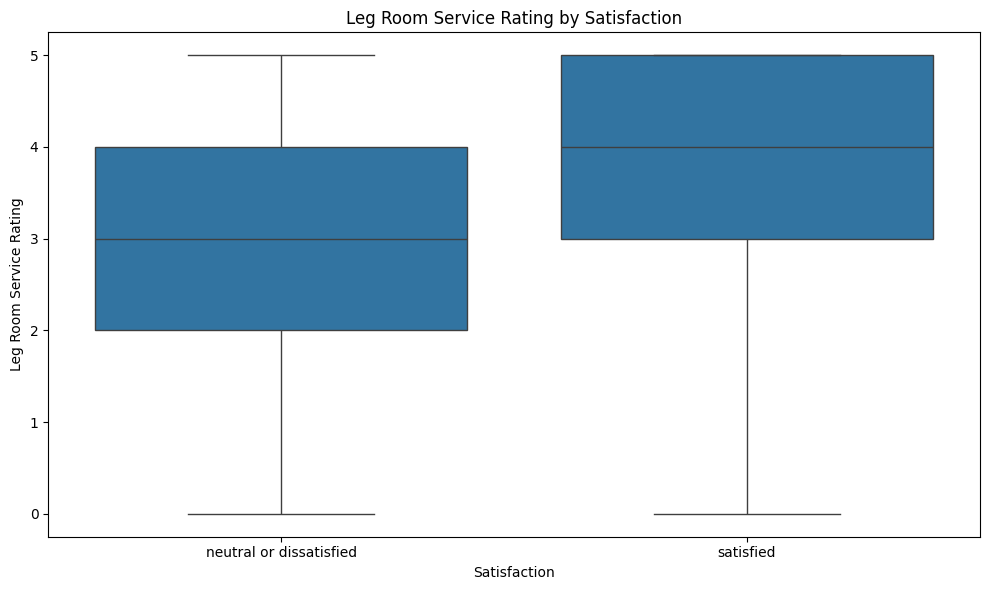

In [15]:
# Leg room service rating by satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Leg room service', data=data)
plt.title('Leg Room Service Rating by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Leg Room Service Rating')
plt.tight_layout()
plt.show()

Similar to gate location, the leg room service rating's boxplot categorizes passengers into satisfied and not satisfied groups. It highlights the importance of leg room service in determining overall passenger satisfaction, showing variations in median ratings and spread between the two groups.

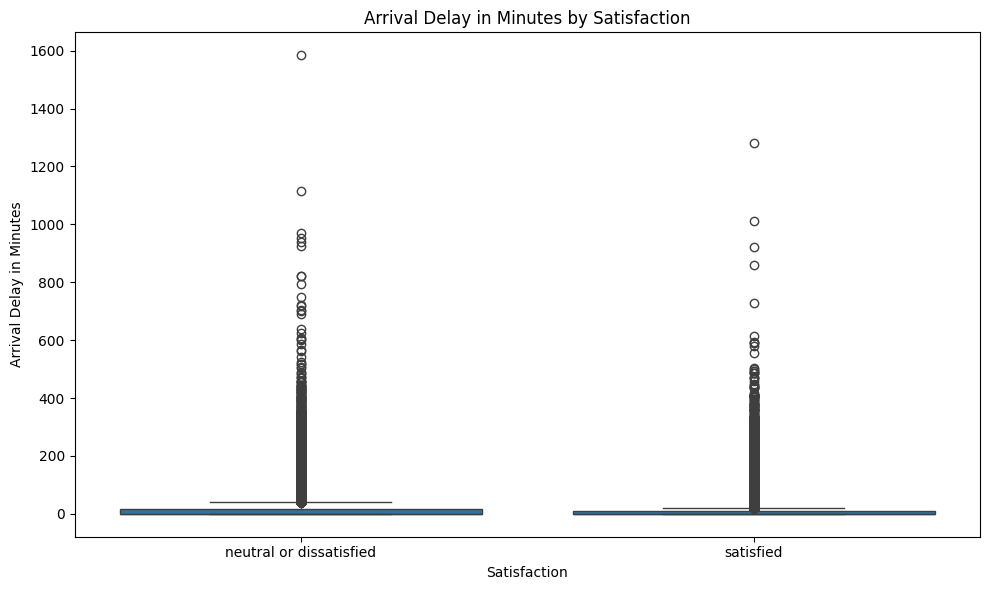

In [16]:
# Arrival Delay in Minutes distribution by satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=data)
plt.title('Arrival Delay in Minutes by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Arrival Delay in Minutes')
plt.tight_layout()
plt.show()

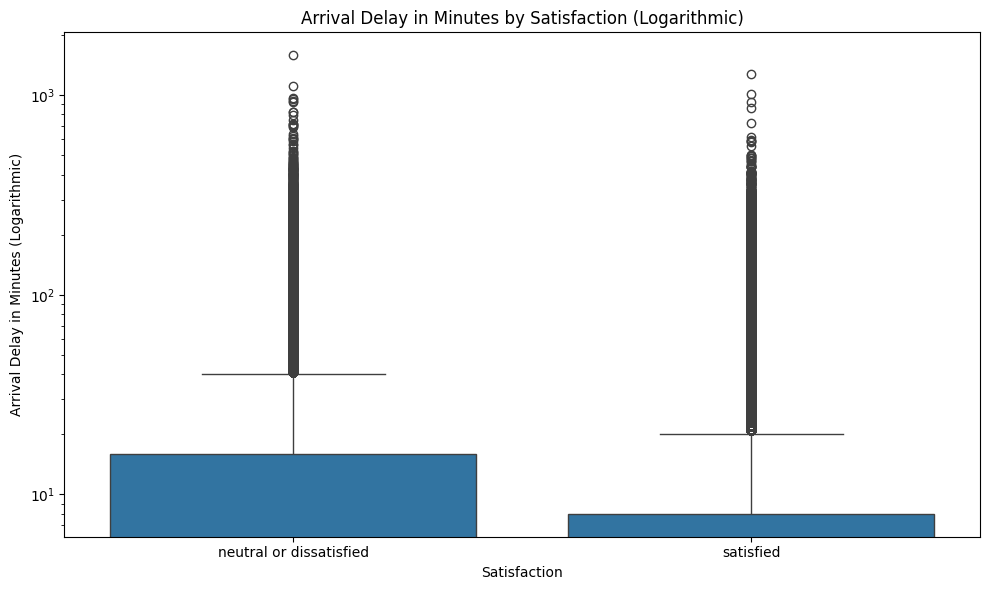

In [17]:
# Logarithmic Arrival Delay in Minutes distribution by satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=data)
plt.title('Arrival Delay in Minutes by Satisfaction (Logarithmic)')
plt.xlabel('Satisfaction')
plt.ylabel('Arrival Delay in Minutes (Logarithmic)')
plt.yscale('log')
plt.tight_layout()

plt.show()

This boxplot compares the arrival delay in minutes against passenger satisfaction. It's crucial for understanding if longer delays correlate strongly with dissatisfaction, indicated by longer arrival delays in the 'not satisfied' group versus the 'satisfied' group. The plot suggests a relationship between delays and satisfaction but also underscores the presence of outliers, indicating that factors other than delay might influence satisfaction.

**Clustering:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


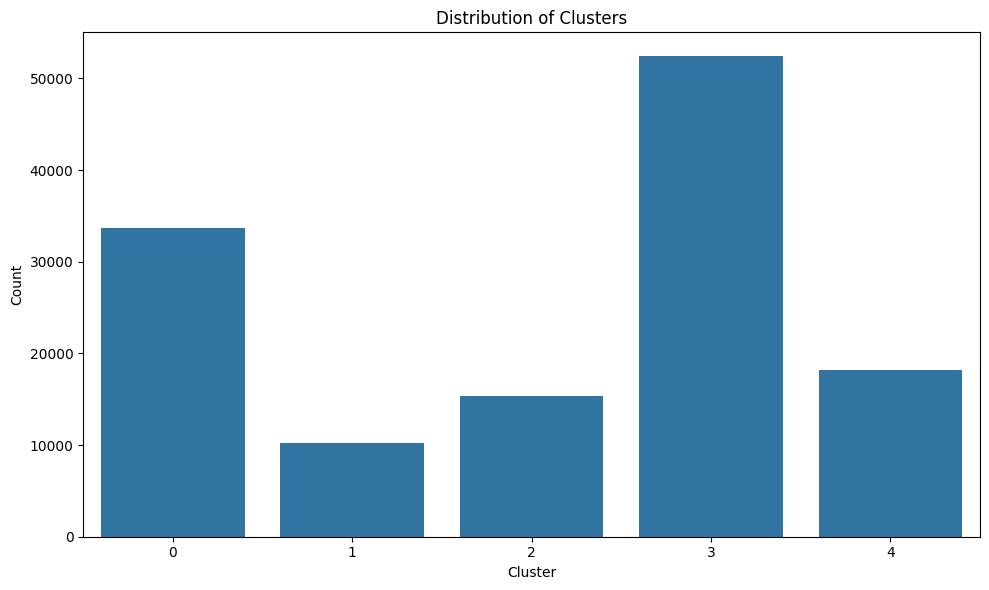

In [18]:
# Clustering: Using KMeans for clustering based on the specified features
features_for_clustering = data[['Flight Distance', 'Arrival Delay in Minutes']]
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_for_clustering)

# Adding cluster information to the dataframe
data['Cluster'] = clusters

# Plotting the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

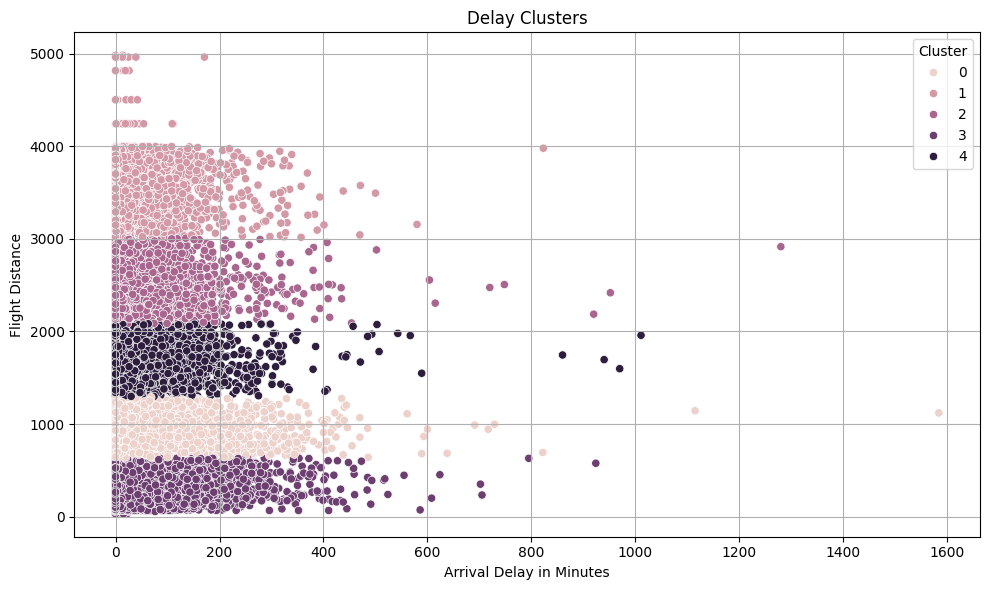

In [19]:
# Plotting the delay clusters againts Flight Distance and Arrival Delay in Minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Arrival Delay in Minutes', y='Flight Distance', hue='Cluster', data=data)
plt.title('Delay Clusters')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Flight Distance')
plt.grid()
plt.tight_layout()
plt.show()

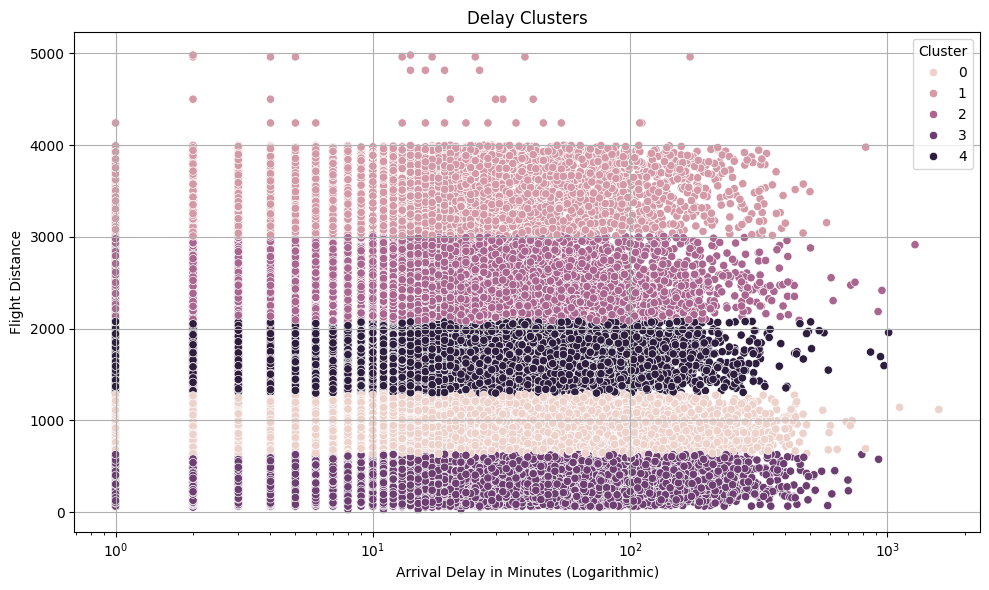

In [20]:
# Plotting the delay clusters againts Flight Distance and Logarithmic Arrival Delay in Minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Arrival Delay in Minutes', y='Flight Distance', hue='Cluster', data=data)
plt.title('Delay Clusters')
plt.xlabel('Arrival Delay in Minutes (Logarithmic)')
plt.ylabel('Flight Distance')
plt.xscale('log')
plt.grid()
plt.tight_layout()
plt.show()

Clustering Distribution
By applying KMeans clustering on the specified features, we segmented the data into two clusters. This clustering could reflect underlying patterns or groupings in the data based on travel type, gate location, leg room service, and arrival delay, which may not be explicitly related to satisfaction but show natural groupings of passenger experiences or preferences.

**Through these plots and clustering, we've gained valuable insights into factors influencing passenger satisfaction. The visualizations underscore the importance of understanding passenger preferences and experiences across different service aspects, providing a foundation for more detailed analysis or predictive modeling. ​**

##**Apply the ML and DL**

**Preprocessing:**

In [21]:
# Encoding 'satisfaction' to numeric
le = LabelEncoder()
train_df['satisfaction_encoded'] = le.fit_transform(train_df['satisfaction'])

# Encoding 'Type of Travel' to numeric for clustering
train_df['Type of Travel_encoded'] = le.fit_transform(train_df['Type of Travel'])

le = LabelEncoder()
test_df['satisfaction_encoded'] = le.fit_transform(test_df['satisfaction'])
test_df['Type of Travel_encoded'] = le.fit_transform(test_df['Type of Travel'])

**Train:**

In [22]:
# Preparing the dataset
X_train = train_df[['Type of Travel_encoded', 'Flight Distance', 'Gate location', 'Leg room service', 'Arrival Delay in Minutes']]
y_train = train_df['satisfaction_encoded']

X_test = test_df[['Type of Travel_encoded', 'Flight Distance', 'Gate location', 'Leg room service', 'Arrival Delay in Minutes']]
y_test = test_df['satisfaction_encoded']

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # No need to scale for Decision Trees
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# MLPClassifier
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
print("MLPClassifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

Logistic Regression Accuracy: 0.7527332922697875
Decision Tree Accuracy: 0.6885971666153372
MLPClassifier Accuracy: 0.7620110871573761


**1. Logistic Regression**

Justification: Logistic Regression is a straightforward and efficient model for binary classification tasks. It works well with linearly separable data and is highly interpretable, making it a good baseline model. It can serve as a benchmark to evaluate the complexity and performance of more sophisticated models.

**2. Decision Tree**

Justification: Decision Trees are versatile models that can handle both numerical and categorical data. They are useful for their interpretability, as they provide clear insight into how decisions are made, making it easier to understand the importance and impact of different features on the prediction. Decision Trees can capture non-linear relationships between features and the target variable.

**3. MLPClassifier (Multi-layer Perceptron Classifier)**

Justification: MLPClassifier, a type of neural network, is suitable for complex datasets with non-linear relationships. It can model intricate patterns through its hidden layers, making it powerful for tasks where Logistic Regression and Decision Trees might fall short. However, it requires careful tuning of parameters and can be less interpretable.

In [23]:
# Performance Evaluation
performance = {}

# Logistic Regression Performance
performance['Logistic Regression'] = classification_report(y_test, y_pred_lr, target_names=le.classes_, output_dict=True)

# Decision Tree Performance
performance['Decision Tree'] = classification_report(y_test, y_pred_dt, target_names=le.classes_, output_dict=True)

# MLPClassifier Performance
performance['MLPClassifier'] = classification_report(y_test, y_pred_mlp, target_names=le.classes_, output_dict=True)

print('Logistic Regression: ', '\n', performance['Logistic Regression'], '\n', 'Decision Tree', '\n' ,performance['Decision Tree'], '\n', 'MLPClassifier:', '\n',performance['MLPClassifier'])

Logistic Regression:  
 {'Business travel': {'precision': 0.792870490153802, 'recall': 0.7570164001921361, 'f1-score': 0.7745287324042545, 'support': 14573}, 'Personal Travel': {'precision': 0.706433427292323, 'recall': 0.7472594931158467, 'f1-score': 0.7262731728105689, 'support': 11403}, 'accuracy': 0.7527332922697875, 'macro avg': {'precision': 0.7496519587230625, 'recall': 0.7521379466539915, 'f1-score': 0.7504009526074117, 'support': 25976}, 'weighted avg': {'precision': 0.75492616355196, 'recall': 0.7527332922697875, 'f1-score': 0.7533454037144331, 'support': 25976}} 
 Decision Tree 
 {'Business travel': {'precision': 0.711812361165556, 'recall': 0.7476154532354354, 'f1-score': 0.7292747414572108, 'support': 14573}, 'Personal Travel': {'precision': 0.6552952202436738, 'recall': 0.6131719722879944, 'f1-score': 0.6335341820323472, 'support': 11403}, 'accuracy': 0.6885971666153372, 'macro avg': {'precision': 0.683553790704615, 'recall': 0.6803937127617149, 'f1-score': 0.681404461744

In [25]:
print("Train : \n", data.isna().sum())

Train : 
 id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Cluster                              0
dtype: int64


##Apply DL and ML for the whole Dataset

In [49]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # No need to scale for Decision Trees
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# MLP Classifier
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

accuracy_lr, accuracy_dt, accuracy_mlp

(0.8761549122266707, 0.9449106867878041, 0.9567292885740684)

In [48]:
# Calculating the detailed performance metrics for each model
report_lr = classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_, output_dict=True)
report_mlp = classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_, output_dict=True)

df_report_lr = pd.DataFrame(report_lr).transpose()
df_report_dt = pd.DataFrame(report_dt).transpose()
df_report_mlp = pd.DataFrame(report_mlp).transpose()

df_report_lr, df_report_dt, df_report_mlp

(              precision    recall  f1-score       support
 0              0.878275  0.905485  0.891673  14622.000000
 1              0.873223  0.838383  0.855448  11354.000000
 accuracy       0.876155  0.876155  0.876155      0.876155
 macro avg      0.875749  0.871934  0.873560  25976.000000
 weighted avg   0.876067  0.876155  0.875839  25976.000000,
               precision    recall  f1-score       support
 0              0.950851  0.951306  0.951079  14622.000000
 1              0.937252  0.936674  0.936963  11354.000000
 accuracy       0.944911  0.944911  0.944911      0.944911
 macro avg      0.944052  0.943990  0.944021  25976.000000
 weighted avg   0.944907  0.944911  0.944909  25976.000000,
               precision    recall  f1-score       support
 0              0.954417  0.969430  0.961865  14622.000000
 1              0.959817  0.940373  0.949996  11354.000000
 accuracy       0.956729  0.956729  0.956729      0.956729
 macro avg      0.957117  0.954902  0.955930  25976.00